<a href="https://colab.research.google.com/github/xqyn/modeling/blob/main/brownie_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brownian motion

$
m\frac{dv}{dt} = -\gamma v + \xi(t)
$

$\sigma = \sqrt{2\gamma^2D} = \sqrt{2\gamma k_BT}$

$\xi = \sqrt{2 \cdot \gamma \ k_B \cdot T \cdot dt}$

$\frac{v_t}{dt} = \frac{(-\gamma v_t + \sqrt{2 \gamma k_B T)}}{m}$

update movement of particle:

$v_t = (-\gamma v_t + \sqrt{2\gamma k_BT})*{dt} / m$


$v_y = v_{i-1} + (-\gamma \cdot v_{i-1} + \xi) \cdot dt/m$



This calculates position using the **overdamped (high friction) approximation** of Brownian motion.


## when it come to brownie motion

**Step 1: Overdamped limit assumption**

When friction is very strong (γ >> m), the particle has negligible inertia. The acceleration term vanishes:
```
m * dv/dt ≈ 0
```

So the Langevin equation becomes:
```
0 = -γv + ξ(t)
```

**Step 2: Solve for velocity**
```
v = ξ(t) / γ
```

The velocity instantly adjusts to balance drag and random force - no momentum buildup.

**Step 3: Integrate to get position**
```
dx/dt = v = ξ(t) / γ

dx = (ξ/γ) * dt
```

$x = \int v \cdot dt  = \xi \cdot y^{-1} \cdot dt$

$x_i = x_{i-1} + \gamma^{-1} \cdot \xi \cdot dt$

[source](https://www.youtube.com/watch?v=AzCzDYLimvc&t=267s/)

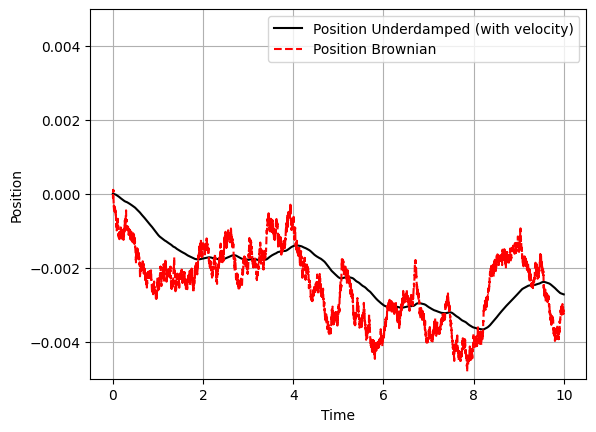

In [42]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy.integrate import cumulative_trapezoid

# parameters for xi
m = 1  # mass
gamma = 1  # damping coefficient
k_B = 1.0  # Boltzmann constant
T = 1.0  # temperature

# parameters for time evolve
dt = 0.001  # time step
total_time = 10.0  # total simulation time

# initial conditions
v0 = 0.0
t_values = np.arange(0, total_time, dt)
v_values = np.zeros_like(t_values)
x_Brownian = np.zeros_like(t_values)

# numerical solution using Euler method
for i in range(1, len(t_values)):
    # stochastic white noise generated with gaussian distribution
    xi = np.random.normal(0, np.sqrt(2 * gamma * k_B * T * dt))
    # update velocity
    v_values[i] = v_values[i - 1] + (-gamma * v_values[i - 1] + xi) * dt / m
    # update position
    x_Brownian[i] = x_Brownian[i-1] + gamma**(-1.0)*xi*dt

x = cumulative_trapezoid(v_values,t_values,initial = 0)
# Plotting the results
plt.plot(t_values, x,'k', label='Position Underdamped (with velocity)')
plt.plot(t_values, x_Brownian,'r--', label='Position Brownian')
plt.ylim(-.005, .005)
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

In [46]:
import numpy as np
import matplotlib.pyplot as plt

V_B = 8 # Scale of energy barriers
# Define the energy landscape and its gradient
def energy_landscape(x, y):
    """Energy function U(x, y)"""
    return V_B*(x**2 - 1)**2 + V_B*(y**2 - 1)**2

def gradient_energy(x, y):
    """Gradient of U(x, y)"""
    dU_dx = V_B * 4 * x * (x**2 - 1)
    dU_dy = V_B * 4 * y * (y**2 - 1)
    return np.stack((dU_dx, dU_dy), axis=-1)  # Return a 2D array for all particles

# Function to apply periodic boundary conditions
def apply_periodic_boundary(positions, x_limits, y_limits):
    positions[:, 0] = (positions[:, 0] - x_limits[0]) % (x_limits[1] - x_limits[0]) + x_limits[0]
    positions[:, 1] = (positions[:, 1] - y_limits[0]) % (y_limits[1] - y_limits[0]) + y_limits[0]
    return positions

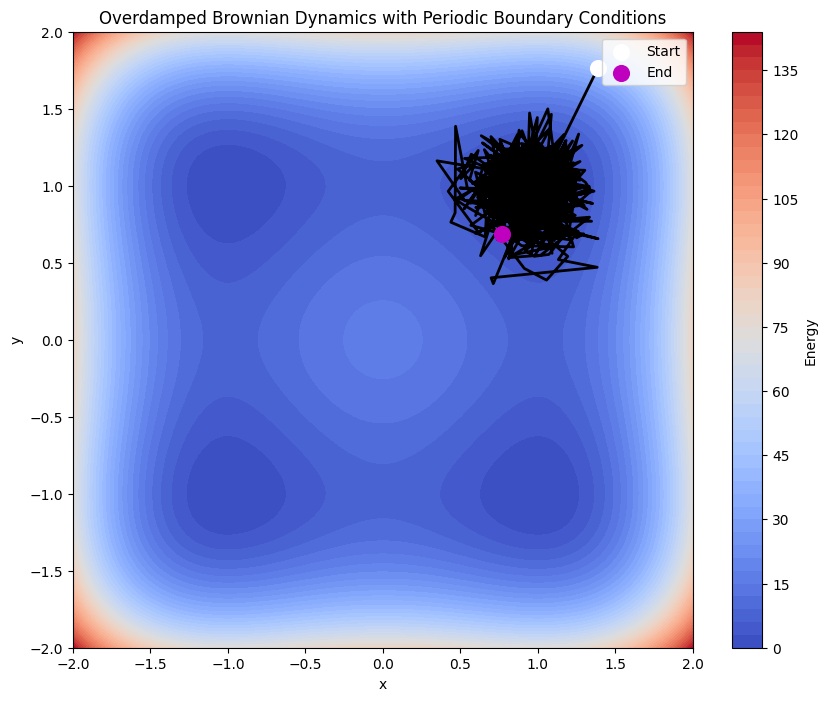

In [47]:
# Simulation parameters
dt = 0.01  # Time step
gamma = 1.0  # Friction coefficient
kT = 1  # Thermal energy
n_steps = 1000  # Number of time steps
n_particles = 1  # Number of particles
x_limits = [-2.0, 2.0]  # x-axis bounds
y_limits = [-2.0, 2.0]  # y-axis bounds

# Initialize particle positions randomly within bounds
positions = np.random.uniform(
    low=[x_limits[0], y_limits[0]],
    high=[x_limits[1], y_limits[1]],
    size=(n_particles, 2)
)

# Store particle trajectories
trajectories = np.zeros((n_steps, n_particles, 2))
trajectories[0] = positions



# Simulation loop (vectorized update for all particles)
for t in range(1, n_steps):
    # Compute the deterministic drift term (force = -grad(U))
    drift = -gradient_energy(positions[:, 0], positions[:, 1]) / gamma

    # Compute the stochastic term
    noise = np.sqrt(2 * kT / gamma) * np.random.normal(size=positions.shape)

    # Update all positions using Euler-Maruyama
    positions += drift * dt + noise * np.sqrt(dt)

    # Apply periodic boundary conditions
    positions = apply_periodic_boundary(positions, x_limits, y_limits)

    # Store trajectories
    trajectories[t] = positions

# Plot the results
# Energy landscape
x = np.linspace(x_limits[0], x_limits[1], 100)
y = np.linspace(y_limits[0], y_limits[1], 100)
X, Y = np.meshgrid(x, y)
U = energy_landscape(X, Y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, U, levels=50, cmap="coolwarm")
plt.colorbar(label="Energy")

# Plot particle trajectories
for i in range(n_particles):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], lw=2, color='k')

plt.scatter(trajectories[0, :, 0], trajectories[0, :, 1], color='w',s=128, label='Start', zorder=5)
plt.scatter(trajectories[-1, :, 0], trajectories[-1, :, 1], color='m',s =128, label='End', zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Overdamped Brownian Dynamics with Periodic Boundary Conditions")
plt.show()

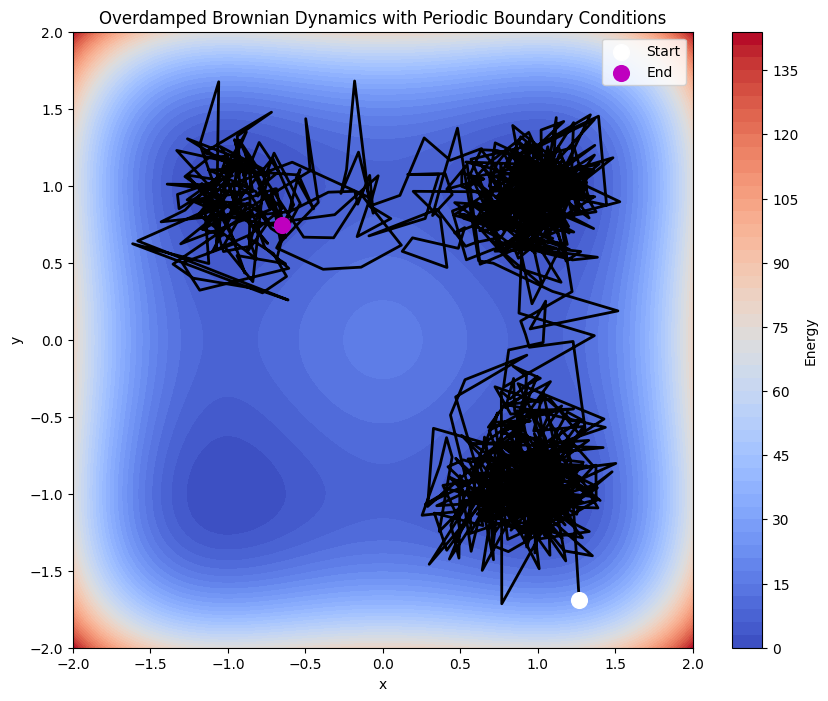

In [48]:
# Simulation parameters
dt = 0.01  # Time step
gamma = 1.0  # Friction coefficient
kT = 2  # Thermal energy
n_steps = 1000  # Number of time steps
n_particles = 1  # Number of particles
x_limits = [-2.0, 2.0]  # x-axis bounds
y_limits = [-2.0, 2.0]  # y-axis bounds

# Initialize particle positions randomly within bounds
positions = np.random.uniform(
    low=[x_limits[0], y_limits[0]],
    high=[x_limits[1], y_limits[1]],
    size=(n_particles, 2)
)

# Store particle trajectories
trajectories = np.zeros((n_steps, n_particles, 2))
trajectories[0] = positions



# Simulation loop (vectorized update for all particles)
for t in range(1, n_steps):
    # Compute the deterministic drift term (force = -grad(U))
    drift = -gradient_energy(positions[:, 0], positions[:, 1]) / gamma

    # Compute the stochastic term
    noise = np.sqrt(2 * kT / gamma) * np.random.normal(size=positions.shape)

    # Update all positions using Euler-Maruyama
    positions += drift * dt + noise * np.sqrt(dt)

    # Apply periodic boundary conditions
    positions = apply_periodic_boundary(positions, x_limits, y_limits)

    # Store trajectories
    trajectories[t] = positions

# Plot the results
# Energy landscape
x = np.linspace(x_limits[0], x_limits[1], 100)
y = np.linspace(y_limits[0], y_limits[1], 100)
X, Y = np.meshgrid(x, y)
U = energy_landscape(X, Y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, U, levels=50, cmap="coolwarm")
plt.colorbar(label="Energy")

# Plot particle trajectories
for i in range(n_particles):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], lw=2, color='k')

plt.scatter(trajectories[0, :, 0], trajectories[0, :, 1], color='w',s=128, label='Start', zorder=5)
plt.scatter(trajectories[-1, :, 0], trajectories[-1, :, 1], color='m',s =128, label='End', zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Overdamped Brownian Dynamics with Periodic Boundary Conditions")
plt.show()

Quick video saved as trajectory_quick.mp4


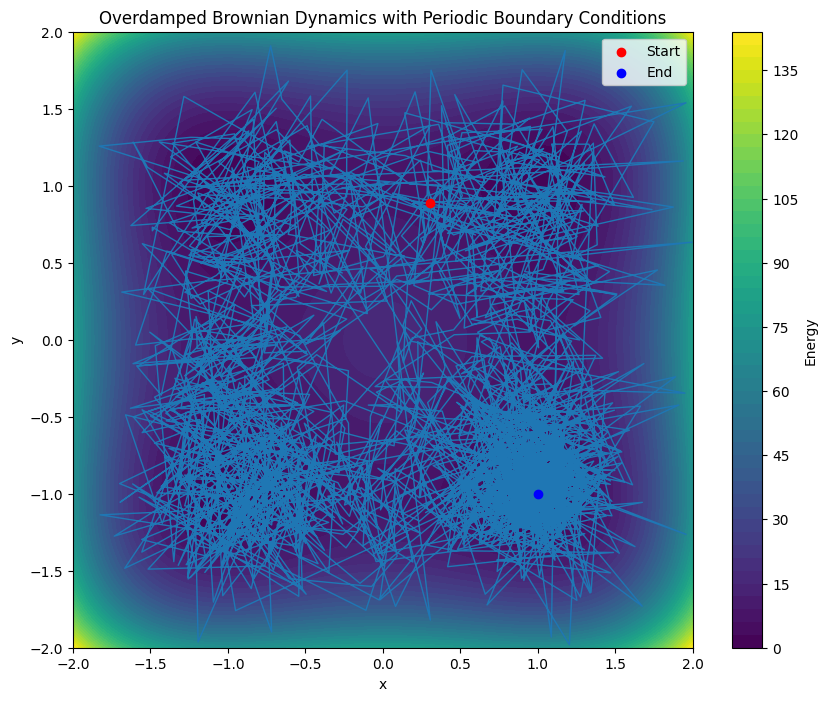

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess


dt = 0.01  # Time step
gamma = 1.0  # Friction coefficient
kT_initial = 10  # Initial thermal energy
kT_final = 0.001  # Final thermal energy
n_steps = 2000  # Reduced number of steps for quick video generation
n_particles = 1  # Single particle for simplicity
x_limits = [-2.0, 2.0]  # x-axis bounds
y_limits = [-2.0, 2.0]  # y-axis bounds

# Initialize particle position randomly within bounds
positions = np.random.uniform(
    low=[x_limits[0], y_limits[0]],
    high=[x_limits[1], y_limits[1]],
    size=(n_particles, 2)
)

# Prepare array to store trajectories
trajectories = np.zeros((n_steps, n_particles, 2))
trajectories[0] = positions

# Precompute time-dependent temperature
kT_values = np.linspace(kT_initial, kT_final, n_steps)

# Time evolution loop
for t in range(1, n_steps):
    # Compute drift term
    drift = -gradient_energy(positions[:, 0], positions[:, 1]) / gamma

    # Compute noise term with time-dependent temperature
    noise_amplitude = np.sqrt(2 * kT_values[t] / gamma * dt)
    noise = noise_amplitude * np.random.normal(size=(n_particles, 2))

    # Update positions (Euler-Maruyama method)
    positions += drift * dt + noise

    # Apply periodic boundary conditions
    positions[:, 0] = (positions[:, 0] - x_limits[0]) % (x_limits[1] - x_limits[0]) + x_limits[0]
    positions[:, 1] = (positions[:, 1] - y_limits[0]) % (y_limits[1] - y_limits[0]) + y_limits[0]

    # Store updated positions
    trajectories[t] = positions

# Plot the results
# Energy landscape
x = np.linspace(x_limits[0], x_limits[1], 100)
y = np.linspace(y_limits[0], y_limits[1], 100)
X, Y = np.meshgrid(x, y)
U = energy_landscape(X, Y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, U, levels=50, cmap="viridis")
plt.colorbar(label="Energy")

# Plot particle trajectories
for i in range(n_particles):
    plt.plot(trajectories[:, i, 0], trajectories[:, i, 1], lw=1)

plt.scatter(trajectories[0, :, 0], trajectories[0, :, 1], color='red', label='Start', zorder=5)
plt.scatter(trajectories[-1, :, 0], trajectories[-1, :, 1], color='blue', label='End', zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Overdamped Brownian Dynamics with Periodic Boundary Conditions")


# Visualization and Video Generation
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# Generate frames for video
x = np.linspace(x_limits[0], x_limits[1], 50)  # Lower resolution for quick rendering
y = np.linspace(y_limits[0], y_limits[1], 50)
X, Y = np.meshgrid(x, y)
U = energy_landscape(X, Y)

N_video = 200
for t in range(0,N_video):
    plt.figure(figsize=(6, 6))
    plt.contourf(X, Y, U, levels=20, cmap="viridis")  # Fewer levels for faster plotting
    plt.colorbar(label="Energy")
    plt.scatter(trajectories[int(t*n_steps/N_video), 0, 0], trajectories[int(t*n_steps/N_video), 0, 1], color="red", label="Particle")
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.title(f"Brownian Dynamics Step {int(t*n_steps/N_video)}")
    plt.legend()
    plt.savefig(f"{output_dir}/frame_{t:03d}.png")
    plt.close()

# Use ffmpeg to create the video
output_video = "trajectory_quick.mp4"
ffmpeg_command = [
    "ffmpeg",
    "-y",  # Overwrite output file if it exists
    "-framerate", "15",  # Lower frame rate for a shorter video
    "-i", f"{output_dir}/frame_%03d.png",  # Input frames
    "-c:v", "libx264",  # Video codec
    "-pix_fmt", "yuv420p",  # Pixel format
    output_video,
]

subprocess.run(ffmpeg_command)

# Clean up the frames
import shutil
shutil.rmtree(output_dir)

print(f"Quick video saved as {output_video}")


# plt.show()